In [65]:
# Import Python modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [66]:
# Read clinical trials data 
file_path = 'C:./data/vaccine_trials.csv'
vaccine_trials = pd.read_csv(file_path, index_col = 0)

# Filter completed studies
trials_filtered = vaccine_trials[vaccine_trials['OverallStatus'] == 'Completed']
trials_filtered

# Drop 'Rank' column
trials_filtered.drop('Rank', axis=1, inplace=True)

# Display the DataFrame
trials_filtered

c:\Users\Bruna Los\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,NCTId,Phase,Condition,EnrollmentCount,OverallStatus
0,NCT00478816,Phase 2,Prophylaxis of Avian Influenza Vaccine,58,Completed
2,NCT03771157,Early Phase 1,Chronic Lymphocytic Leukemia (CLL)|Waldenstrom...,33,Completed
3,NCT03057483,NaN,Influenza Vaccines,533,Completed
4,NCT00735410,Phase 3,"Seasonal Influenza, Vaccine",134,Completed
5,NCT00103116,Phase 2,Lung Cancer,32,Completed
...,...,...,...,...,...
994,NCT00430521,Phase 2,Influenza|Influenza Vaccines,512,Completed
995,NCT01062477,Phase 3,Diphtheria|Tetanus|Pertussis|Haemophilus Influ...,1056,Completed
996,NCT02236052,Phase 2,Virus Diseases|RNA Virus Infections|Respirator...,450,Completed
997,NCT03357276,Phase 1|Phase 2,Metastatic Colorectal Cancer|Reaction - Mixed ...,30,Completed



### Retrieve data from AACT

1. Use this link: [AACT Download](https://aact.ctti-clinicaltrials.org/download)
2. Select pipe-delimited files.
3. Download the latest version of the "Current Month's Daily Static Copies."


#### Information about each table

You can find information about each table in the AACT dataset [here](https://aact.ctti-clinicaltrials.org/data_dictionary).



In [67]:
# Read drop_withdrawals file from AACT database
file_path = 'C:./data/drop_withdrawal.txt'

# select only the id, nct_id, period, reason, and count columns
drop_withdrawals = pd.read_csv(file_path, header=0, sep="|", usecols=[0,1,4,5,6])

# Rename nct_id column to NCTId 
drop_withdrawals = drop_withdrawals.rename(columns={"nct_id": "NCTId"})

# Display the DataFrame
drop_withdrawals

,id,NCTId,period,reason,count
0,41463481,NCT01443026,Overall Study,Physician Decision,1.0
1,41463482,NCT01443026,Overall Study,Physician Decision,0.0
2,41463483,NCT01443026,Overall Study,Death,0.0
3,41463484,NCT01443026,Overall Study,Death,1.0
4,41463485,NCT01443026,Overall Study,Withdrawal by Subject,0.0
...,...,...,...,...,...
463552,41835055,NCT02333331,Overall Study,Protocol Deviation,1.0
463553,41835056,NCT02333331,Overall Study,Patient/Guardian Decision,1.0
463554,41835057,NCT02333331,Overall Study,Patient/Guardian Decision,2.0
463555,41835058,NCT02333331,Overall Study,Patient/Guardian Decision,9.0


#### Exploring the data

In [68]:
# Merge the vaccine clinical trials file with the drop withdrawals file on the NCT Id
trials_drop = pd.merge(drop_withdrawals, trials_filtered, on='NCTId')
trials_drop

,id,NCTId,period,reason,count,Phase,Condition,EnrollmentCount,OverallStatus
0,41557479,NCT00992836,Overall Study,Lost to Follow-up,1.0,Phase 2,HIV Infections|H1N1 Influenza Virus,155,Completed
1,41557480,NCT00992836,Overall Study,Withdrawal by Subject,2.0,Phase 2,HIV Infections|H1N1 Influenza Virus,155,Completed
2,41557481,NCT00992836,Overall Study,Protocol Violation,2.0,Phase 2,HIV Infections|H1N1 Influenza Virus,155,Completed
3,41559459,NCT00938392,Overall Study,Adverse Event,0.0,Phase 3,Influenza,726,Completed
4,41559460,NCT00938392,Overall Study,Adverse Event,1.0,Phase 3,Influenza,726,Completed
...,...,...,...,...,...,...,...,...,...
2804,41463026,NCT01666782,Overall Study,Enrolled both years; year 1 data used,0.0,Phase 2,Cancer|Influenza Viral Infections,105,Completed
2805,41553941,NCT01258595,Overall Study,Lost to Follow-up,1.0,Phase 2,Influenza,300,Completed
2806,41553942,NCT01258595,Overall Study,Lost to Follow-up,0.0,Phase 2,Influenza,300,Completed
2807,41553943,NCT01258595,Overall Study,Withdrawal by Subject,0.0,Phase 2,Influenza,300,Completed


In [69]:
# Print information about the DataFrame
trials_drop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2809 entries, 0 to 2808
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               2809 non-null   int64  
 1   NCTId            2809 non-null   object 
 2   period           2809 non-null   object 
 3   reason           2809 non-null   object 
 4   count            2809 non-null   float64
 5   Phase            2800 non-null   object 
 6   Condition        2809 non-null   object 
 7   EnrollmentCount  2809 non-null   int64  
 8   OverallStatus    2809 non-null   object 
dtypes: float64(1), int64(2), object(6)
memory usage: 219.5+ KB


In [70]:
# Count unique events per column
unique_counts = trials_drop.nunique()
unique_counts

id                 2809
NCTId               218
period               26
reason              156
count               106
Phase                 7
Condition           123
EnrollmentCount     196
OverallStatus         1
dtype: int64

In [71]:
# Check for duplicates
duplicates = trials_drop.duplicated()
print(duplicates.value_counts())

False    2809
dtype: int64


In [72]:
# Count NaN values per column
nan_counts = trials_drop.isna().sum()
nan_counts

id                 0
NCTId              0
period             0
reason             0
count              0
Phase              9
Condition          0
EnrollmentCount    0
OverallStatus      0
dtype: int64

In [73]:
# Summary statistics

#trials_drop.describe(include = 'all')
trials_drop.describe()

,id,count,EnrollmentCount
count,2.809000e+03,2809.000000,2809.000000
mean,4.166494e+07,10.702029,2368.951228
std,1.239859e+05,107.464779,6864.402191
min,4.146058e+07,0.000000,1.000000
25%,4.156007e+07,0.000000,449.000000
50%,4.165647e+07,1.000000,777.000000
75%,4.173069e+07,3.000000,1893.000000
max,4.192300e+07,3006.000000,84496.000000


In [74]:
# Group by 'NCTId' and count occurrences of each 'reason'
reason_counts = trials_drop.groupby(['NCTId', 'reason']).size().reset_index(name='count')
reason_counts

,NCTId,reason,count
0,NCT00101166,progressive disease,1
1,NCT00130793,Lost to Follow-up,2
2,NCT00130793,Withdrew consent,2
3,NCT00244374,Declined to participate in cohort,5
4,NCT00244374,Did not complete baseline procedures,5
...,...,...,...
783,NCT05091307,Other,4
784,NCT05091307,Physician Decision,4
785,NCT05091307,Protocol Violation,4
786,NCT05091307,Randomized but not vaccinated,4


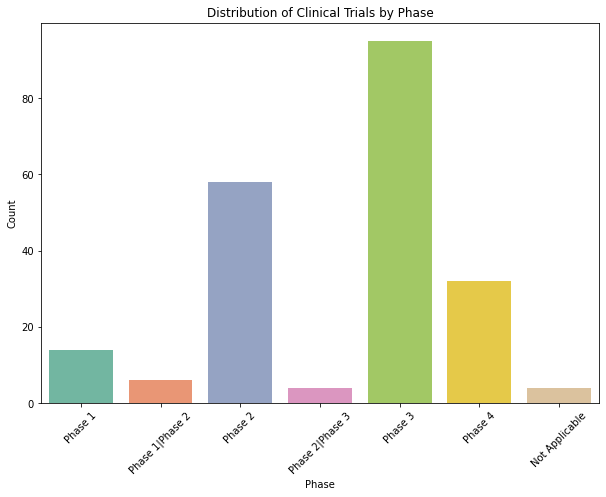

In [75]:
# Plot the distribution of clinical trials by phase

# Select only 'NCTId' and 'Phase' columns
phase_df = trials_drop[['NCTId', 'Phase']]
phase_df = phase_df.drop_duplicates()


# Define the order for phases
phase_order = ['Phase 1', 'Phase 1|Phase 2','Phase 2', 'Phase 2|Phase 3', 'Phase 3', 'Phase 4', 'Not Applicable']


# Set the figure size
plt.figure(figsize=(10, 7))

# Plot a countplot
sns.countplot(x='Phase', data=phase_df, palette='Set2', order=phase_order)
plt.title('Distribution of Clinical Trials by Phase')
plt.xlabel('Phase')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


#### Analysis

- Identify the most frequently reported reasons for patients discontinuing their participation in clinical trials related to vaccine interventions.

In [76]:
# Select only 'id' and 'reason' columns
reason_df = trials_drop[['id', 'reason']]
reason_df = reason_df.drop_duplicates()
reason_df

,id,reason
0,41557479,Lost to Follow-up
1,41557480,Withdrawal by Subject
2,41557481,Protocol Violation
3,41559459,Adverse Event
4,41559460,Adverse Event
...,...,...
2804,41463026,Enrolled both years; year 1 data used
2805,41553941,Lost to Follow-up
2806,41553942,Lost to Follow-up
2807,41553943,Withdrawal by Subject


In [77]:
# Calculate the total count for each condition
reason_counts = reason_df['reason'].value_counts().reset_index()

# Rename the columns for clarity
reason_counts.columns = ['Reason', 'TotalCount']

# Display the resulting DataFrame
reason_counts.head()

,Reason,TotalCount
0,Lost to Follow-up,548
1,Withdrawal by Subject,531
2,Protocol Violation,347
3,Adverse Event,248
4,Death,123


<Figure size 864x432 with 0 Axes>

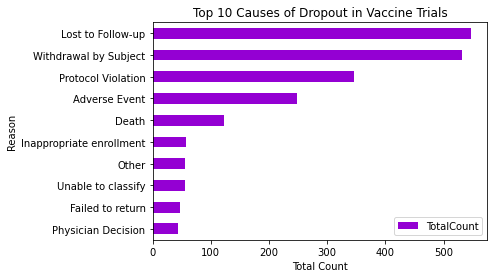

In [78]:
# Select the top 10 reasons
top_10_reasons = reason_counts.head(10)[::-1]

# Create a bar chart for the top 10 reasons, sorted in descending order
plt.figure(figsize=(12, 6))
top_10_reasons.plot(x='Reason', y='TotalCount', kind='barh', color='darkviolet')
plt.title('Top 10 Causes of Dropout in Vaccine Trials')
plt.xlabel('Total Count')
plt.ylabel('Reason')
plt.show()

- Determine the prevalence of vaccines utilized as interventions in clinical trials by identifying the most frequently administered ones.

In [79]:
# Select only 'NCTId' and 'Condition' columns
condition_df = trials_drop[['NCTId', 'Condition']]
condition_df = condition_df.drop_duplicates()
condition_df

,NCTId,Condition
0,NCT00992836,HIV Infections|H1N1 Influenza Virus
3,NCT00938392,Influenza
9,NCT01162122,Influenza
27,NCT01027845,"Infections, Streptococcal"
51,NCT02286895,Diarrhea Rotavirus
...,...,...
2749,NCT01214850,N. Meningitidis Carriage
2770,NCT01209780,Seasonal Influenza
2795,NCT01359449,Meningitis|Meningococcal Infection
2801,NCT01666782,Cancer|Influenza Viral Infections


In [80]:
# Calculate the total count for each condition
condition_counts = condition_df['Condition'].value_counts().reset_index()

# Rename the columns for clarity
condition_counts.columns = ['Condition', 'TotalCount']

# Display the resulting DataFrame
condition_counts.head()

,Condition,TotalCount
0,Influenza,36
1,Meningococcal Disease,9
2,"Vaccines, Pneumococcal",8
3,Meningitis|Meningococcal Meningitis|Meningococ...,7
4,"Infections, Streptococcal",6


<Figure size 864x432 with 0 Axes>

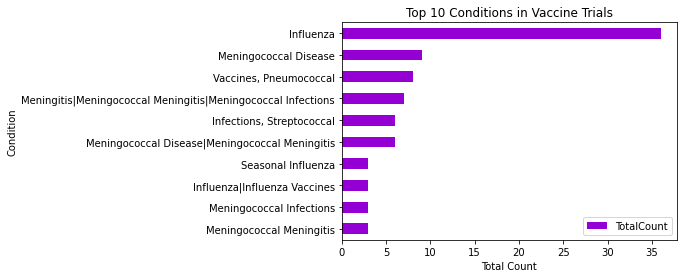

In [81]:
# Select the top 10 reasons
top_10_conditions = condition_counts.head(10)[::-1]

# Create a bar chart for the top 10 conditions, sorted in descending order
plt.figure(figsize=(12, 6))
top_10_conditions.plot(x='Condition', y='TotalCount', kind='barh', color='darkviolet')
plt.title('Top 10 Conditions in Vaccine Trials')
plt.xlabel('Total Count')
plt.ylabel('Condition')
plt.show()